In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

def visualize_graph_from_file(file_path, coords_file_path, metrics_to_plot, statistics_to_plot, title, show_plot=False):
    """
    Visualizes a 3D graph using Matplotlib, coloring the nodes based on the selected statistic.

    :param file_path: Path to the CSV file containing metric data.
    :param metrics_to_plot: List of metrics to visualize (e.g., ['closeness', 'degree']).
    :param statistics_to_plot: List of statistics to visualize (e.g., ['Mean', 'Median']).
    :param coords_file_path: Path to the CSV file containing the coordinates (x, y, z) of the nodes.
    """
    # Read the CSV files containing the metric data and coordinates
    data = pd.read_csv(file_path)
    coords_data = pd.read_csv(coords_file_path)

    # Extract unique nodes and metrics
    nodes = data['Node'].unique()

    # Function to create a graph and assign metrics as node attributes
    def create_graph_with_metrics(data):
        G = nx.Graph()

        # Add nodes with their corresponding metrics to the graph
        for node in nodes:
            node_data = data[data['Node'] == node]
            node_metrics = {
                row['Metric']: {
                    'Mean': row['Mean'],
                    'Median': row['Median'],
                    'StdDev': row['Standard Deviation']
                } for _, row in node_data.iterrows()
            }
            G.add_node(node, **node_metrics)

        return G

    # Create the graph with the metric attributes
    G = create_graph_with_metrics(data)

    # Function to extract the coordinates of each node from the coordinate data
    def get_node_positions(coords_data):
        positions = {}
        for _, row in coords_data.iterrows():
            node = row['Node']
            positions[node] = (row['x'], row['y'], row['z'])
        return positions

    # Get the positions (coordinates) of the nodes
    pos = get_node_positions(coords_data)

    # Function to visualize the graph in 3D using Matplotlib
    def visualize_graph_by_statistic(G, metric, statistic, title="Graph Visualization"):
        """
        Visualizes a 3D graph with NetworkX and Matplotlib, coloring the nodes based on the selected statistic.
        """
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(title)

        # Extract the values of the selected statistic for coloring the nodes
        values = [G.nodes[node].get(metric, {}).get(statistic, 0) for node in G.nodes()]
        colormap = plt.cm.plasma  # Use a vivid colormap
        norm = mcolors.Normalize(vmin=min(values), vmax=max(values))

        # Plot the nodes with colors based on the statistic values
        x = [pos[node][0] for node in G.nodes()]
        y = [pos[node][1] for node in G.nodes()]
        z = [pos[node][2] for node in G.nodes()]
        colors = [colormap(norm(value)) for value in values]

        ax.scatter(x, y, z, c=colors, s=80, label=f'Nodes ({metric} - {statistic})')  # Increase node size for visibility

        # Plot the edges of the graph
        for edge in G.edges():
            x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
            y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
            z_edge = [pos[edge[0]][2], pos[edge[1]][2]]
            ax.plot(x_edge, y_edge, z_edge, c='black', alpha=0.7, linewidth=0.8)  # Darker edges with slightly thicker lines

        # Add a color bar to the plot
        plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, label=f'{metric} ({statistic})')
        if show_plot:
            plt.show()

    # Visualize the graph for each combination of selected metric and statistic
    for metric in metrics_to_plot:
        for statistic in statistics_to_plot:
            visualize_graph_by_statistic(G, metric=metric, statistic=statistic,
                                         title=f"Graph of {metric.capitalize()}-{statistic} ({title})")

In [2]:
from matplotlib.backends.backend_pdf import PdfPages

# Save all charts to a PDF
def save_charts_to_pdf(pdf_filename="charts_output.pdf"):
    """
    Save all generated matplotlib figures into a PDF.

    Args:
        pdf_filename (str): The name of the output PDF file.
    """
    # Get all current figure objects
    figures = [plt.figure(i) for i in plt.get_fignums()]

    if not figures:
        print("No figures to save.")
        return

    # Save figures to PDF
    with PdfPages(pdf_filename) as pdf:
        for fig in figures:
            pdf.savefig(fig)  # Save each figure to the PDF

    print(f"Charts saved to {pdf_filename}")

Charts saved to pd_60-.pdf


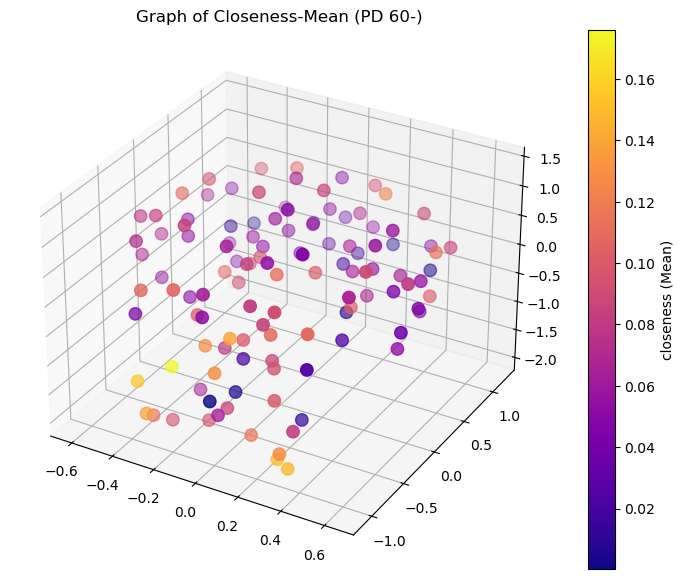

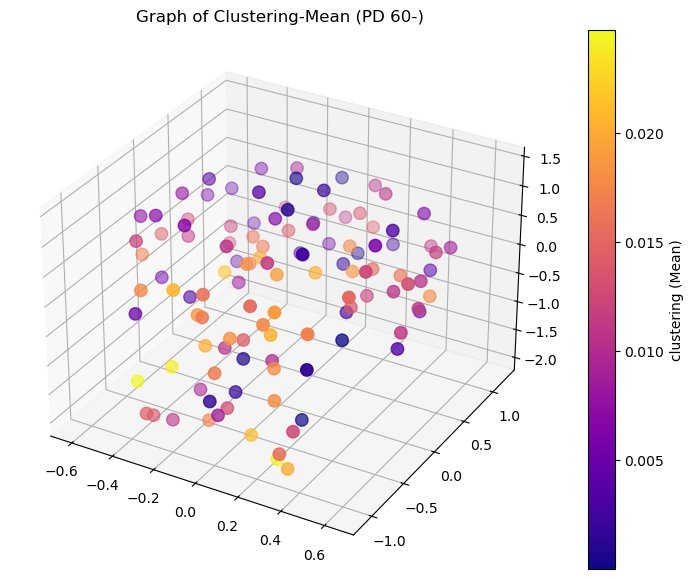

In [3]:
# Define the path to the coordinates data file
coords_file_path = 'aal116.csv'
# Define the path to the file containing the node differences data
file_path = '../analysis/ppmi/60-/comparison/pd/node_differences.csv'
# Specify the metrics to visualize (e.g., closeness, degree, clustering)
metrics_to_plot = ['closeness', 'clustering']  # The metrics you want to visualize
# Specify the statistics to visualize (e.g., Mean)
statistics_to_plot = ['Mean']   # The statistics you want to visualize
# Visualize the graph with the selected parameters (metrics and statistics)
visualize_graph_from_file(file_path, coords_file_path, metrics_to_plot, statistics_to_plot, "PD 60-")
save_charts_to_pdf("pd_60-.pdf")

Charts saved to asd_11-.pdf


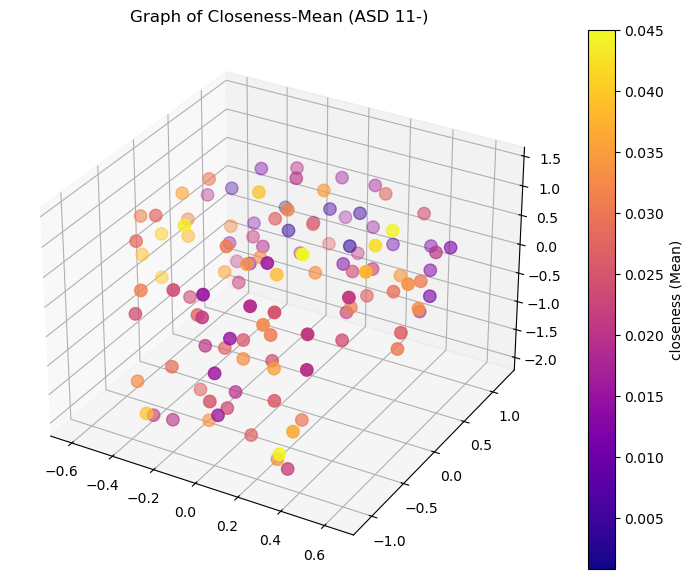

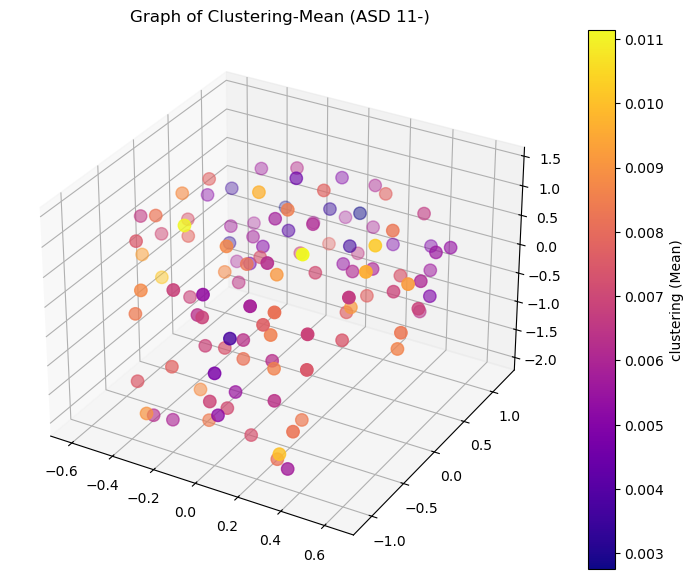

In [4]:
# Define the path to the coordinates data file
coords_file_path = 'aal116.csv'
# Define the path to the file containing the node differences data
file_path = '../analysis/abide/11-/comparison/patient/node_differences.csv'
# Specify the metrics to visualize (e.g., closeness, degree, clustering)
metrics_to_plot = ['closeness', 'clustering']  # The metrics you want to visualize
# Specify the statistics to visualize (e.g., Mean)
statistics_to_plot = ['Mean']   # The statistics you want to visualize
# Visualize the graph with the selected parameters (metrics and statistics)
visualize_graph_from_file(file_path, coords_file_path, metrics_to_plot, statistics_to_plot, "ASD 11-")
save_charts_to_pdf("asd_11-.pdf")